In [4]:
%pwd

'c:\\ex\\py\\cvdir\\cv_dl'

In [5]:
import numpy as np

fruits = np.load('../fruits_300.npy')
fruits_2d = fruits.reshape(-1, 100*100)

In [9]:
fruits_2d

array([[1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       ...,
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1],
       [1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [11]:
fruits_2d.shape

(300, 10000)

In [7]:
from sklearn.cluster import KMeans

In [8]:
km = KMeans(n_clusters=3, random_state=42)

In [12]:
help(km.fit)

Help on method fit in module sklearn.cluster._kmeans:

fit(X, y=None, sample_weight=None) method of sklearn.cluster._kmeans.KMeans instance
    Compute k-means clustering.
    
    Parameters
    ----------
    X : {array-like, sparse matrix} of shape (n_samples, n_features)
        Training instances to cluster. It must be noted that the data
        will be converted to C ordering, which will cause a memory
        copy if the given data is not C-contiguous.
        If a sparse matrix is passed, a copy will be made if it's not in
        CSR format.
    
    y : Ignored
        Not used, present here for API consistency by convention.
    
    sample_weight : array-like of shape (n_samples,), default=None
        The weights for each observation in X. If None, all observations
        are assigned equal weight. `sample_weight` is not used during
        initialization if `init` is a callable or a user provided array.
    
        .. versionadded:: 0.20
    
    Returns
    -------
  

In [13]:
km.fit(fruits_2d)

KMeans(n_clusters=3, random_state=42)

In [14]:
km.labels_

array([2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2,
       2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2,
       0, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 2, 2,
       2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [15]:
print(np.unique(km.labels_, return_counts=True))

(array([0, 1, 2]), array([112,  98,  90], dtype=int64))


In [16]:
import matplotlib.pyplot as plt


def draw_fruits(arr, ratio=1):
    n = len(arr)    # n은 샘플 개수입니다
    # 한 줄에 10개씩 이미지를 그립니다. 샘플 개수를 10으로 나누어 전체 행 개수를 계산합니다.
    rows = int(np.ceil(n/10))
    # 행이 1개 이면 열 개수는 샘플 개수입니다. 그렇지 않으면 10개입니다.
    cols = n if rows < 2 else 10
    fig, axs = plt.subplots(rows, cols,
                            figsize=(cols*ratio, rows*ratio), squeeze=False)
    for i in range(rows):
        for j in range(cols):
            if i*10 + j < n:    # n 개까지만 그립니다.
                axs[i, j].imshow(arr[i*10 + j], cmap='gray_r')
            axs[i, j].axis('off')
    plt.show()

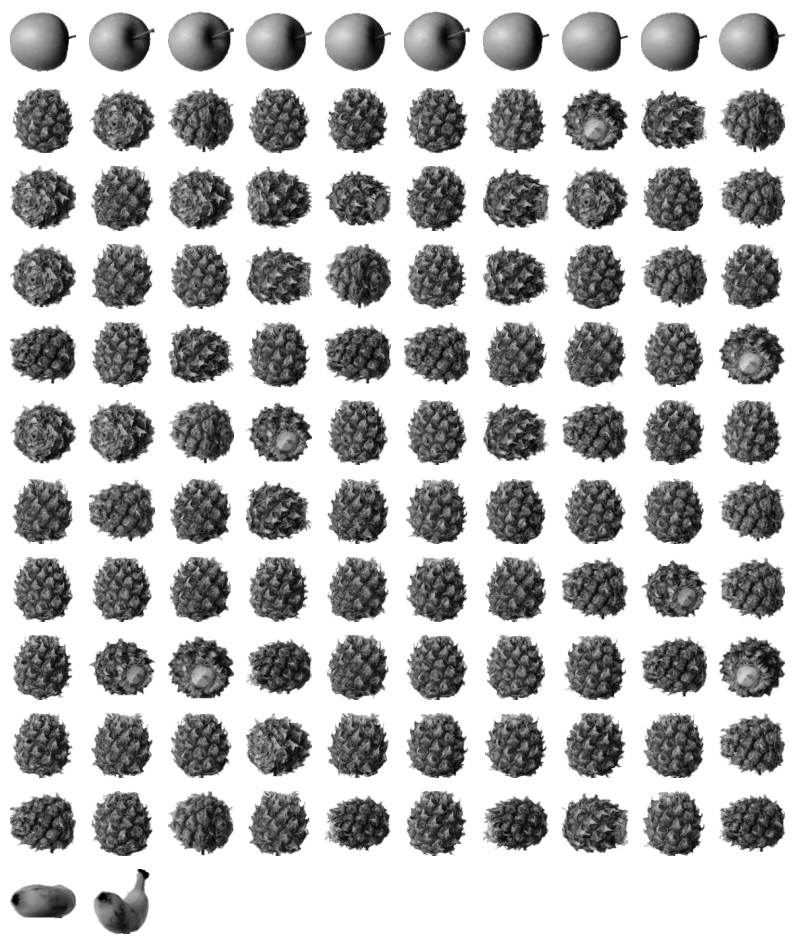

In [17]:
draw_fruits(fruits[km.labels_ == 0])

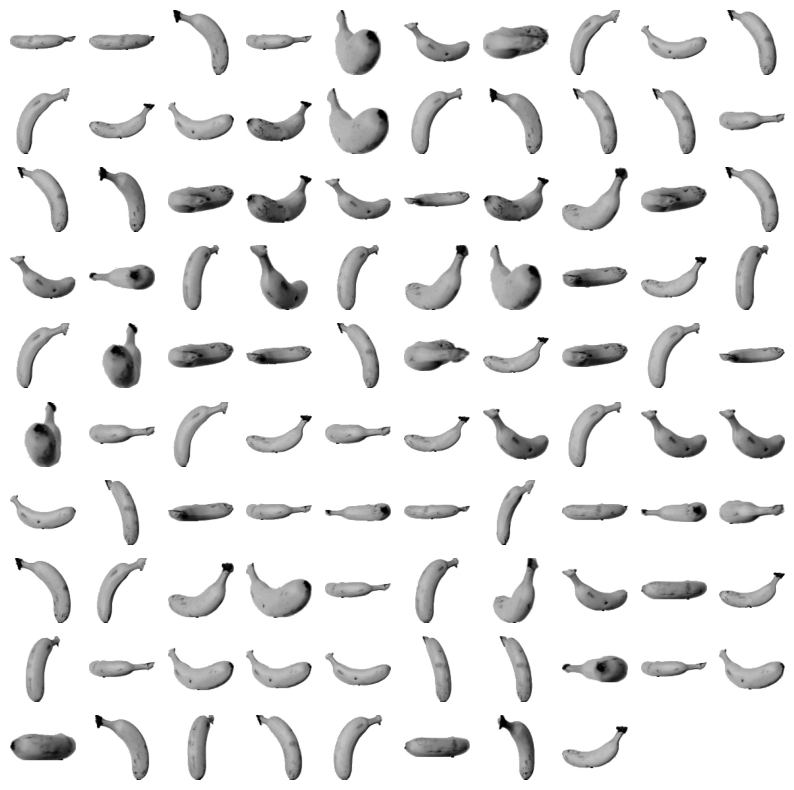

In [18]:
draw_fruits(fruits[km.labels_ == 1])

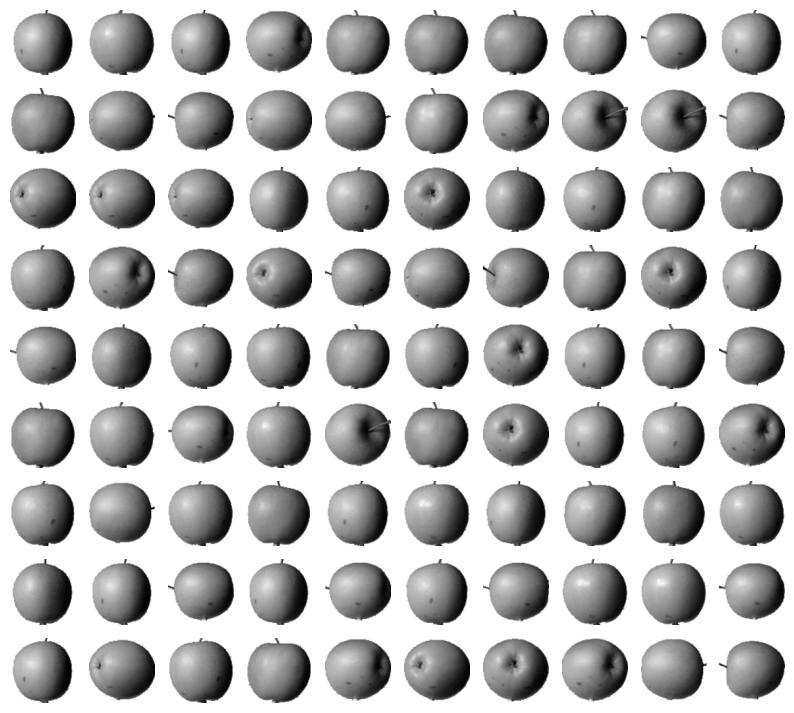

In [19]:
draw_fruits(fruits[km.labels_ == 2])

In [20]:
km.cluster_centers_

array([[1.        , 1.        , 1.        , ..., 1.        , 1.        ,
        1.        ],
       [1.10204082, 1.07142857, 1.10204082, ..., 1.        , 1.        ,
        1.        ],
       [1.01111111, 1.01111111, 1.01111111, ..., 1.        , 1.        ,
        1.        ]])

In [21]:
km.cluster_centers_.shape

(3, 10000)

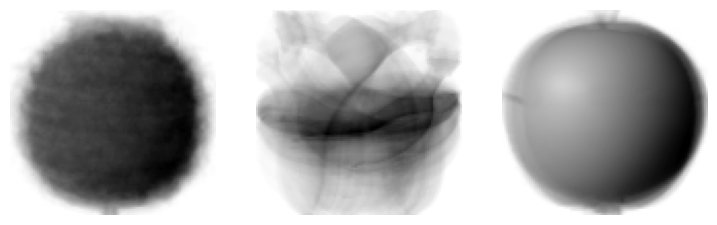

In [22]:
draw_fruits(km.cluster_centers_.reshape(-1, 100, 100), ratio=3)

In [23]:
fruits_2d[100:101]

array([[1, 1, 1, ..., 1, 1, 1]], dtype=uint8)

In [ ]:
# 훈련데이터 샘플에서 클러스터 중심까지 거리로 변환해주는 transform()메서드


In [24]:
km.transform(fruits_2d[100:101])

array([[3400.24197319, 8837.37750892, 5279.33763699]])

In [25]:
km.predict(fruits_2d[100:101])

array([0])

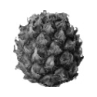

In [27]:
draw_fruits(fruits[100:101])

In [28]:
km.inertia_

5075273831.931917

In [29]:
km.n_iter_

4

In [30]:
# 이너셔(inertia) : 클러스터 중심과 클러스터에 속한 샘플 사이의 거리, 그 거리의 제곱합
# 이너셔는 클러스터에 속한 샘플이 얼마나 가깝게 모여있는지를 나타내는 값

# 엘보우(elbow) 방법 : 클러스터 개수를 늘려가면서 이너셔의 변화를 관찰하여 최적의 클러스터 개수를 찾아야 함

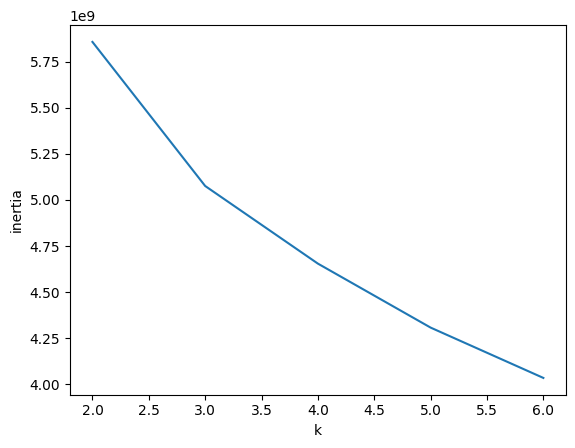

In [31]:
inertia = []
for k in range(2, 7):
    km = KMeans(n_clusters=k, n_init='auto', random_state=42)
    km.fit(fruits_2d)
    inertia.append(km.inertia_)

plt.plot(range(2, 7), inertia)
plt.xlabel('k')
plt.ylabel('inertia')
plt.show()